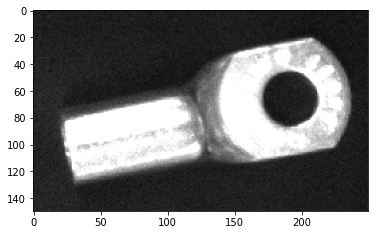

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
import matplotlib
import matplotlib.pyplot as plt

PATH = '/content/drive/MyDrive/AI Insight/hw 19/'

origin_side_height = 200
origin_side_width = 350
side_height = 150
side_width = 250

template = kimage.load_img(PATH+'Template_lug.png', target_size=(origin_side_height, origin_side_width)) #PIL image
template = kimage.img_to_array(template)
template = tf.image.crop_to_bounding_box(template, 20, 0, side_height, side_width) #crop image
template = kimage.array_to_img(template)
plt.imshow(template)

kimage.save_img(PATH+'Template_lug_new.png', template)

24
(1, 150, 250, 3)
(1, 250, 150, 3)
(1, 150, 250, 3)
(1, 250, 150, 3)
(1, 150, 250, 3)
(1, 250, 150, 3)
(1, 150, 250, 3)
(1, 250, 150, 3)
(1, 125, 225, 3)
(1, 225, 125, 3)
(1, 125, 225, 3)
(1, 225, 125, 3)
(1, 125, 225, 3)
(1, 225, 125, 3)
(1, 125, 225, 3)
(1, 225, 125, 3)
(1, 100, 200, 3)
(1, 200, 100, 3)
(1, 100, 200, 3)
(1, 200, 100, 3)
(1, 100, 200, 3)
(1, 200, 100, 3)
(1, 100, 200, 3)
(1, 200, 100, 3)


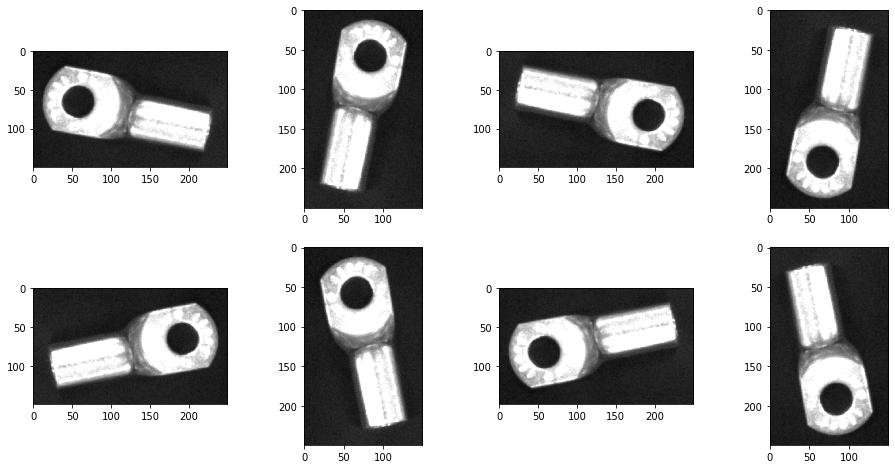

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib
import matplotlib.pyplot as plt

PATH = '/content/drive/MyDrive/AI Insight/hw 19/'

# create a template
side_height = 150
side_width = 250
scale_level = 3
rotates = 4
flips = 2

list_of_templates = []
for i in range(scale_level):
  for f in range(flips):
    for j in range(rotates): 
      template = kimage.load_img(PATH+'Template_lug_new.png', target_size=(side_height - 25*i, side_width - 25*i)).rotate(90*j, expand=True)
      template = np.expand_dims(template, axis=0)
      if f == 0:   
        template = tf.image.flip_left_right(template)      
      list_of_templates.append(template)

print(len(list_of_templates))
for i in range(len(list_of_templates)):
  print(list_of_templates[i].shape)

# show a template
fig = plt.figure(figsize=(16,8))
for i in range(1, rotates*flips + 1):
  fig.add_subplot(flips, rotates, i)
  plt.imshow(list_of_templates[i-1][0])

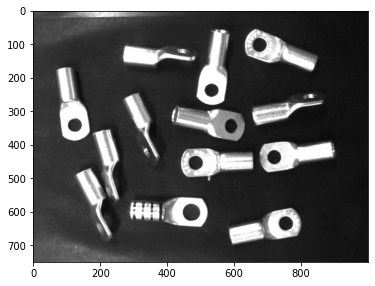

In [ ]:
height = 750
width  = 1000

# load an image
image_path = PATH+'Image_lug1.jpg'
image = kimage.load_img(image_path, target_size=(height, width))
image = np.expand_dims(image, axis=0)

plt.figure(figsize=(6,6))
plt.imshow(image[0])

In [ ]:
# Create the base model 
model = tf.keras.applications.VGG16(input_shape=(None,None,3),
                                               include_top=False,
                                               weights='imagenet')

# compute features for templates
list_of_features = []
for i in range(scale_level*flips*rotates):
  features = model.predict(list_of_templates[i])
  list_of_features.append(features)

# compute features for image
image_features = model.predict(image)

# check
print(image_features.shape)
for i in range(scale_level*rotates*flips):
  print(list_of_features[i].shape)

(1, 23, 31, 512)
(1, 4, 7, 512)
(1, 7, 4, 512)
(1, 4, 7, 512)
(1, 7, 4, 512)
(1, 4, 7, 512)
(1, 7, 4, 512)
(1, 4, 7, 512)
(1, 7, 4, 512)
(1, 3, 7, 512)
(1, 7, 3, 512)
(1, 3, 7, 512)
(1, 7, 3, 512)
(1, 3, 7, 512)
(1, 7, 3, 512)
(1, 3, 7, 512)
(1, 7, 3, 512)
(1, 3, 6, 512)
(1, 6, 3, 512)
(1, 3, 6, 512)
(1, 6, 3, 512)
(1, 3, 6, 512)
(1, 6, 3, 512)
(1, 3, 6, 512)
(1, 6, 3, 512)


In [ ]:
sim_data = []
height_fm = image_features.shape[1]
width_fm  = image_features.shape[2]

for s in range(scale_level):
  for f in range(flips):
    for r in range(rotates):
      side_fm_height = list_of_features[8*s+4*f+r].shape[1]
      side_fm_width = list_of_features[8*s+4*f+r].shape[2]
      for i in range(height_fm-side_fm_height+1):
        for j in range(width_fm-side_fm_width+1):
          patch = image_features[0,i:i+side_fm_height,j:j+side_fm_width,:]
          sim = cosine_similarity(np.reshape(patch, (1, -1)), np.reshape(list_of_features[8*s+4*f+r], (1,-1)))
          if (r%2) == 0:
            sim_data.append((sim[0][0], i, j, side_height-25*s, side_width-25*s, r*90, f))
          else:
            sim_data.append((sim[0][0], i, j, side_width-25*s, side_height-25*s, r*90, f))

def getKey(item):
    return item[0]

sim_data_sorted = sorted(sim_data, key=getKey, reverse=True)

for i in range(10):
  print(sim_data_sorted[i])

(0.85062975, 18, 18, 125, 225, 0, 1)
(0.83555245, 18, 18, 150, 250, 0, 1)
(0.82564753, 18, 17, 150, 250, 0, 1)
(0.74325216, 1, 19, 150, 250, 0, 0)
(0.69343436, 17, 18, 150, 250, 180, 0)
(0.6776198, 12, 13, 150, 250, 0, 0)
(0.6711945, 12, 13, 150, 250, 180, 1)
(0.6671719, 18, 19, 125, 225, 0, 1)
(0.6647304, 18, 18, 125, 225, 180, 0)
(0.65477616, 18, 22, 125, 225, 0, 0)


<Figure size 1152x1152 with 0 Axes>

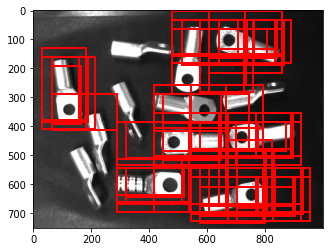

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = kimage.load_img(image_path, target_size=(750, 1000))

plt.figure(figsize=(16,16))
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
scale_height = height//height_fm
scale_width  = width//width_fm
for i in range(len(sim_data_sorted)): 
  if sim_data_sorted[i][0] > 0.5:
    rect = patches.Rectangle((sim_data_sorted[i][2]*scale_width, sim_data_sorted[i][1]*scale_height), 
                          sim_data_sorted[i][4], sim_data_sorted[i][3], 
                          linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

In [ ]:
from scipy.spatial import distance

def check_duplication(i,j,data):
  result = False
  coord1 = (i,j)
  length = len(data)
  for k in range(length):
    coord2 = (data[k][1], data[k][2])
    dst = distance.euclidean(coord1, coord2)
    if (dst < 5):
      result = True
      break
  return result

# remove duplication
def remove_duplication(data):
  result = []
  length = len(data)
  for k in range(length-1):
    duplicated = check_duplication(data[k][1], data[k][2], result)
    if (duplicated==False and data[k][0]>0.5):
      result.append(data[k])
  return result

result = remove_duplication(sim_data_sorted)

for i in range(len(result)):
  print(result[i])

(0.85062975, 18, 18, 125, 225, 0, 1)
(0.74325216, 1, 19, 150, 250, 0, 0)
(0.6776198, 12, 13, 150, 250, 0, 0)
(0.623521, 5, 1, 250, 150, 270, 1)
(0.6124604, 12, 21, 125, 225, 0, 0)
(0.5773935, 16, 9, 150, 250, 180, 0)
(0.5433099, 9, 17, 100, 200, 180, 1)


<Figure size 1152x1152 with 0 Axes>

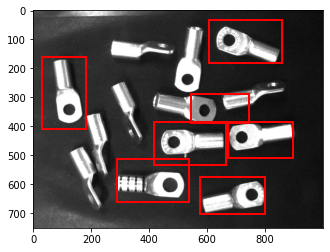

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = kimage.load_img(image_path, target_size=(750, 1000))

plt.figure(figsize=(16,16))
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

# Create a Rectangle patch
scale_height = height//height_fm
scale_width  = width//width_fm
for i in range(len(result)): 
  rect = patches.Rectangle((result[i][2]*scale_width, result[i][1]*scale_height), 
                          result[i][4], result[i][3], 
                          linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
plt.show()